In [1]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands
import glob

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Handedness: [classification {
  index: 1
  score: 0.9909456968307495
  label: "Right"
}
, classification {
  index: 0
  score: 0.9789479970932007
  label: "Left"
}
]
hand_landmarks: landmark {
  x: 0.6862125396728516
  y: 0.7709897756576538
  z: 2.705274084746634e-07
}
landmark {
  x: 0.6528846025466919
  y: 0.7305217385292053
  z: -0.017870113253593445
}
landmark {
  x: 0.62668776512146
  y: 0.6553300023078918
  z: -0.029509542509913445
}
landmark {
  x: 0.6029582023620605
  y: 0.6047027707099915
  z: -0.040577683597803116
}
landmark {
  x: 0.5832328796386719
  y: 0.5581030249595642
  z: -0.051451824605464935
}
landmark {
  x: 0.6830029487609863
  y: 0.5357739329338074
  z: -0.014862770214676857
}
landmark {
  x: 0.6855954527854919
  y: 0.4479077458381653
  z: -0.03081088326871395
}
landmark {
  x: 0.6828417778015137
  y: 0.39075008034706116
  z: -0.04590262100100517
}
landmark {
  x: 0.678989827632904
  y: 0.34354665875434875
  z: -0.05741355940699577
}
landmark {
  x: 0.703366339206

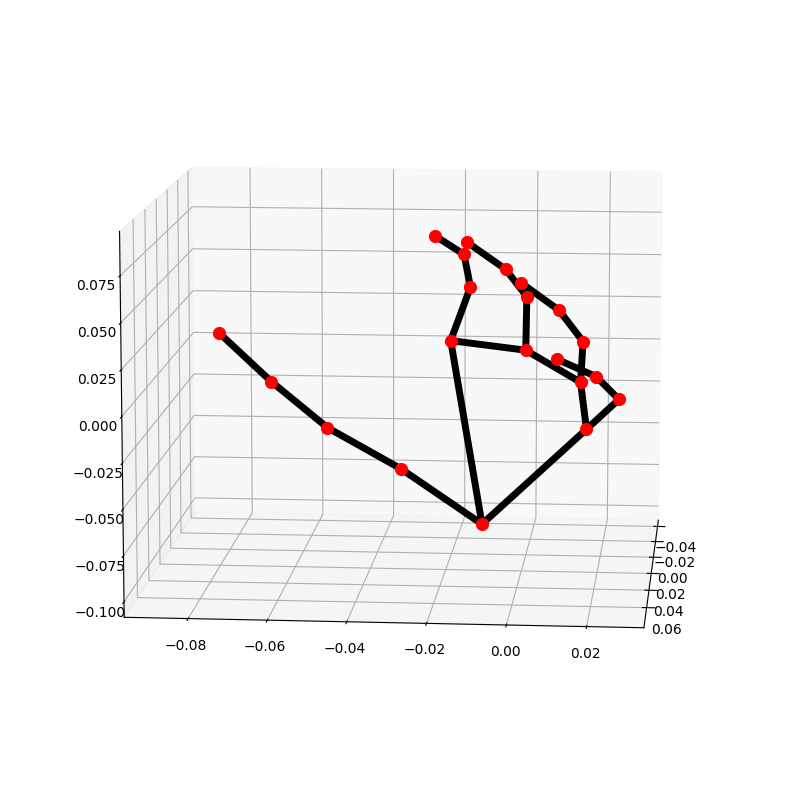

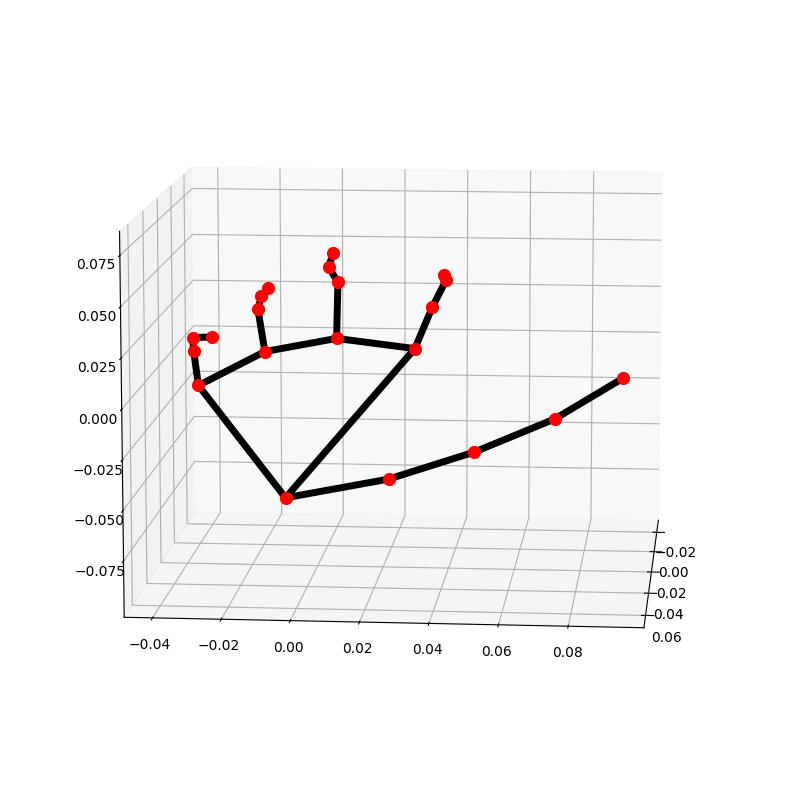

Handedness: None
Handedness: [classification {
  index: 1
  score: 0.9773011207580566
  label: "Right"
}
, classification {
  index: 1
  score: 0.9914752840995789
  label: "Right"
}
]
hand_landmarks: landmark {
  x: 0.44209638237953186
  y: 0.8034707903862
  z: 1.8397011558590748e-07
}
landmark {
  x: 0.4122951030731201
  y: 0.7743866443634033
  z: -0.017551979050040245
}
landmark {
  x: 0.3904479742050171
  y: 0.7261228561401367
  z: -0.028935210779309273
}
landmark {
  x: 0.3742370009422302
  y: 0.6790469288825989
  z: -0.03881923109292984
}
landmark {
  x: 0.3559310734272003
  y: 0.6421260237693787
  z: -0.04869702458381653
}
landmark {
  x: 0.4141088128089905
  y: 0.6345725059509277
  z: -0.020855451002717018
}
landmark {
  x: 0.405661940574646
  y: 0.5618975758552551
  z: -0.03530973941087723
}
landmark {
  x: 0.40162393450737
  y: 0.5183485746383667
  z: -0.046889130026102066
}
landmark {
  x: 0.39893385767936707
  y: 0.4734852612018585
  z: -0.05570193752646446
}
landmark {
  x:

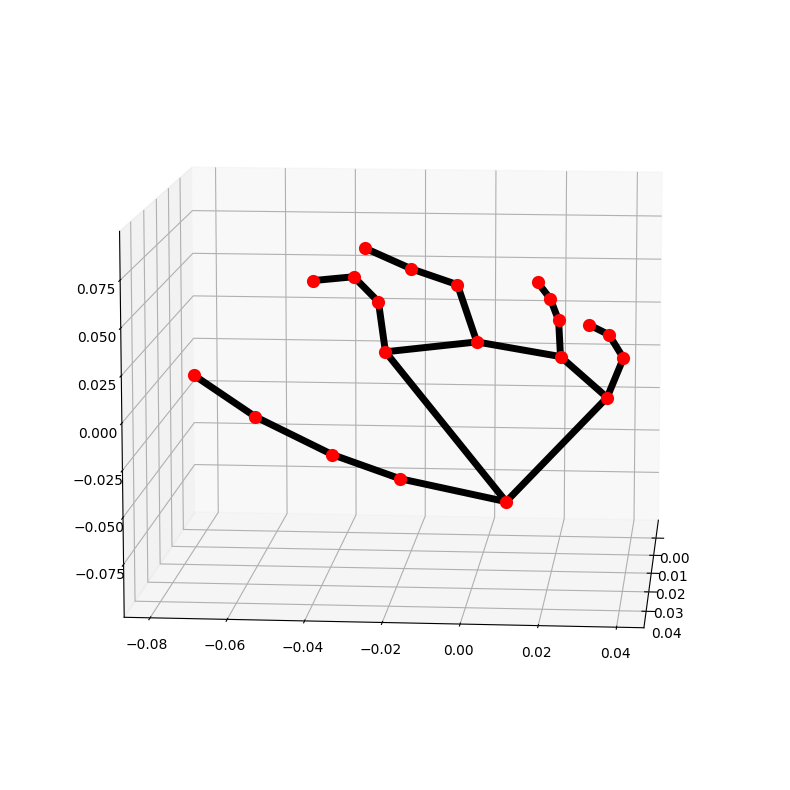

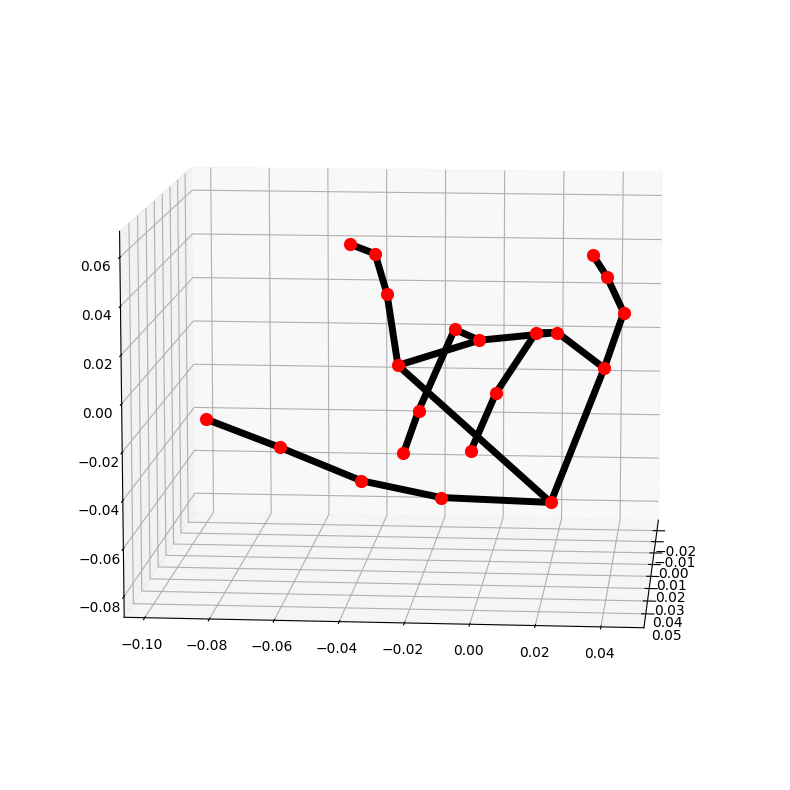

Handedness: [classification {
  index: 1
  score: 0.9796472787857056
  label: "Right"
}
, classification {
  index: 0
  score: 0.9552221298217773
  label: "Left"
}
]
hand_landmarks: landmark {
  x: 0.3952753245830536
  y: 0.9064255356788635
  z: 5.8361894872405173e-08
}
landmark {
  x: 0.4087892770767212
  y: 0.8296498656272888
  z: -0.012346848845481873
}
landmark {
  x: 0.40905073285102844
  y: 0.7630730867385864
  z: -0.02178344503045082
}
landmark {
  x: 0.41383397579193115
  y: 0.7056306004524231
  z: -0.02955869771540165
}
landmark {
  x: 0.4248211979866028
  y: 0.6602905988693237
  z: -0.037904202938079834
}
landmark {
  x: 0.3313412368297577
  y: 0.7562760710716248
  z: -0.018002495169639587
}
landmark {
  x: 0.31082776188850403
  y: 0.6910327672958374
  z: -0.016575517132878304
}
landmark {
  x: 0.29459208250045776
  y: 0.6566271185874939
  z: -0.01744161732494831
}
landmark {
  x: 0.2790816128253937
  y: 0.6328122019767761
  z: -0.019948625937104225
}
landmark {
  x: 0.306280

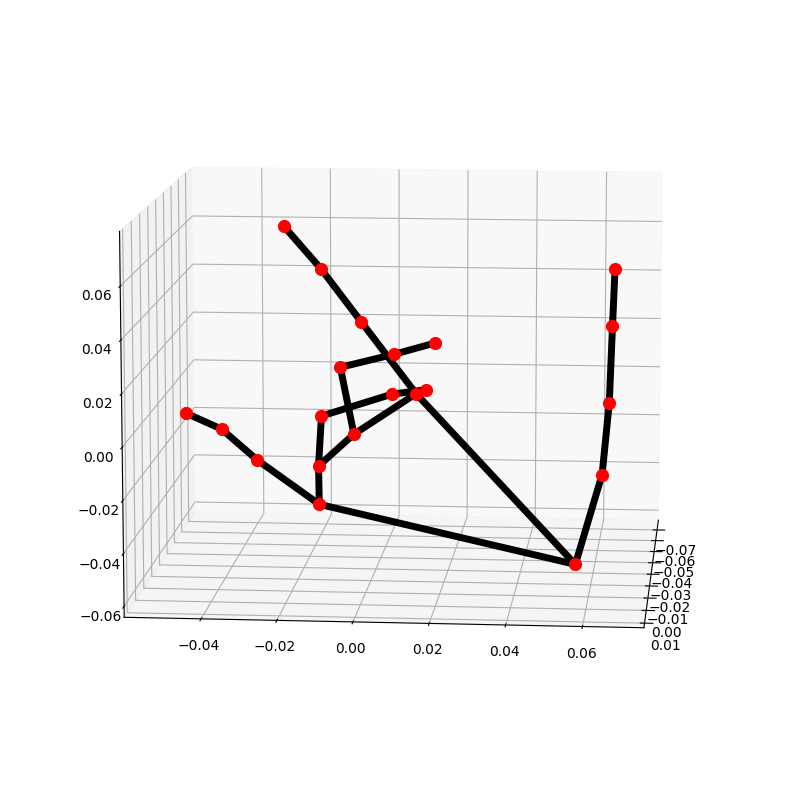

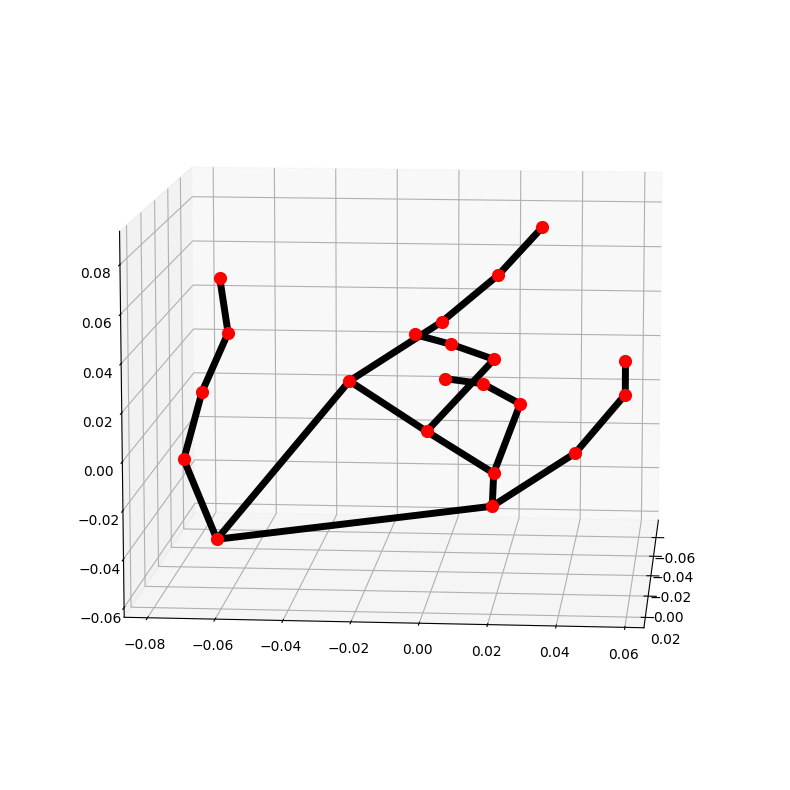

In [2]:
# For static images:
basedir = "../../testdata/hand/img"
filenames = glob.glob(basedir+"/*.jpg")
IMAGE_FILES = {name: cv2.imread(name) for name in filenames}

with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      print('hand_landmarks:', hand_landmarks)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    cv2.imwrite(
        '/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
    # Draw hand world landmarks.
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)